## Process New River Bathymetry ##
Take the bathymetry produced by Michael including the better resolved river and process it.
We need to do the following steps:
1. Straighten North Open Boundary
2. Straighten West Open Boundary
3. Add shallow Jetty
4. Check dredged River Channel
5. Smooth

In [471]:
import cmocean.cm as cm 
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np

from salishsea_tools import bathy_tools, viz_tools

%matplotlib inline

import matplotlib.colors as matcolors
import matplotlib.cm as cmx

In [55]:
# Plotting Set Up
#cmap = plt.get_cmap('cm')
cmap = cm.deep
cmap.set_bad('darkgreen')
ylim = (47, 51)
xlim = (-126.3, -122.2)
cNorm  = matcolors.Normalize(vmin=0, vmax=14)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap='cool')

### 0. Michael's Bathymetry ###

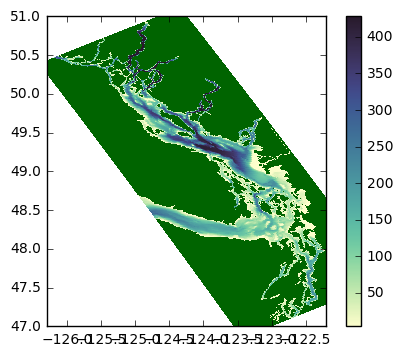

In [28]:
md_bathyfile = nc.Dataset('/home/mdunphy/MEOPAR/Bathy/bathy_meter_SalishSeaM0.nc')
lon = md_bathyfile.variables['nav_lon']
lat = md_bathyfile.variables['nav_lat']
md_bathy = md_bathyfile.variables['Bathymetry']

fig, ax = plt.subplots(1, 1, figsize=(5, 4))
viz_tools.set_aspect(ax, coords='map')
mesh = ax.pcolormesh(lon[:], lat[:], md_bathy[:], cmap=cmap)
fig.colorbar(mesh, ax=ax)
ax.set_ylim(ylim)
ax.set_xlim(xlim);

### 1. Straighten Northern Boundary

In [32]:
ns_bathy = np.copy(md_bathy[:])
js = 37
je = 70

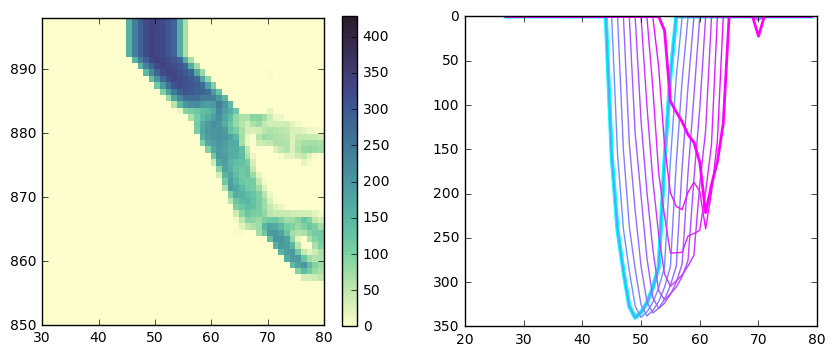

In [61]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

viz_tools.set_aspect(axs[0])
mesh = axs[0].pcolormesh(ns_bathy, cmap=cmap)
fig.colorbar(mesh, ax=axs[0])
axs[0].set_ylim((850, 898))
axs[0].set_xlim((30, 80));

axs[1].plot(range(js-10, je+10), ns_bathy[897, js-10:je+10], color=scalarMap.to_rgba(0), linewidth=3)
for i in range(1, 14):
    axs[1].plot(range(js-10, je+10), ns_bathy[897-i, js-10:je+10], color=scalarMap.to_rgba(i))
axs[1].plot(range(js-10, je+10), ns_bathy[897-14, js-10:je+10], color=scalarMap.to_rgba(14), linewidth=2)
axs[1].invert_yaxis()

In [59]:
init_north = md_bathy[897, :]
# shift north bathymetry 7 points west
north = np.zeros_like(init_north)
north[js:je] = init_north[js-7:je-7]

#first 6 grid points (0-5) use the same, core profile shifted east.  After that merge into the original
#bathymetry, shifting South by half a grid point per grid point east.

# Closest 5 rows to northern boundary, all the same as the boundary
for i in range(898-5, 898):
    ns_bathy[i, js:je] = north[js:je]
# Now move away from the boundary, blending    
i=5; ii=898-1-i
ns_bathy[ii, js:je] = (-i+15)/10.*north[js:je] + (i-5)/10.*ns_bathy[ii, js:je]
i=6; ii=898-1-i
ns_bathy[ii, js:je] = (-i+15)/10.*north[js-1:je-1] + (i-5)/10.*ns_bathy[ii, js:je]
i=7; ii=898-1-i
ns_bathy[ii, js:je] = (-i+15)/10.*north[js-2:je-2] + (i-5)/10.*ns_bathy[ii, js:je]
i=8; ii=898-1-i
ns_bathy[ii, js:je] = (-i+15)/10.*north[js-3:je-3] + (i-5)/10.*ns_bathy[ii, js:je]
i=9; ii=898-1-i
ns_bathy[ii, js:je] = (-i+15)/10.*north[js-4:je-4] + (i-5)/10.*ns_bathy[ii, js:je]
i=10; ii=898-1-i
ns_bathy[ii, js:je] = (-i+15)/10.*north[js-5:je-5] + (i-5)/10.*ns_bathy[ii, js:je]
i=11; ii=898-1-i
ns_bathy[ii, js:je] = (-i+15)/10.*north[js-6:je-6] + (i-5)/10.*ns_bathy[ii, js:je]
i=12; ii=898-1-i
ns_bathy[ii, js:je] = (-i+15)/10.*north[js-7:je-7] + (i-5)/10.*ns_bathy[ii, js:je]
i=13; ii=898-1-i
ns_bathy[ii, js:je] = (-i+15)/10.*north[js-8:je-8] + (i-5)/10.*ns_bathy[ii, js:je]
i=14; ii=898-1-i
ns_bathy[ii, js:je] = (-i+15)/10.*north[js-9:je-9] + (i-5)/10.*ns_bathy[ii, js:je]


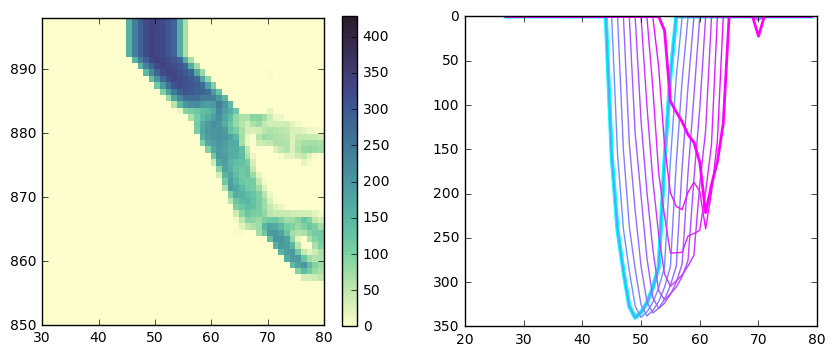

In [62]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

viz_tools.set_aspect(axs[0])
mesh = axs[0].pcolormesh(ns_bathy, cmap=cmap)
fig.colorbar(mesh, ax=axs[0])
axs[0].set_ylim((850, 898))
axs[0].set_xlim((30, 80));

axs[1].plot(range(js-10, je+10), ns_bathy[897, js-10:je+10], color=scalarMap.to_rgba(0), linewidth=3)
for i in range(1, 14):
    axs[1].plot(range(js-10, je+10), ns_bathy[897-i, js-10:je+10], color=scalarMap.to_rgba(i))
axs[1].plot(range(js-10, je+10), ns_bathy[897-14, js-10:je+10], color=scalarMap.to_rgba(14), linewidth=2)
axs[1].invert_yaxis()

### 2. Straighten Western Boundary

In [144]:
ws_bathy = np.copy(ns_bathy[:])
iss = 350
iee = 470

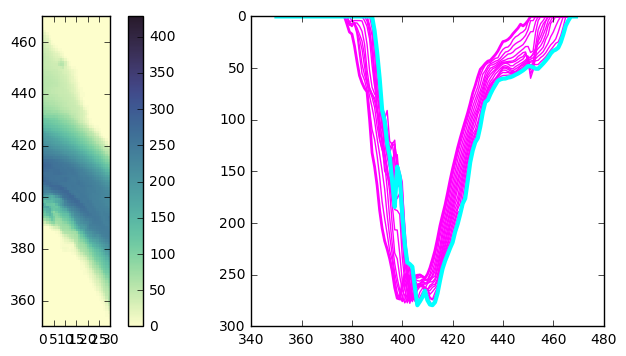

In [145]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

viz_tools.set_aspect(axs[0])
mesh = axs[0].pcolormesh(ws_bathy, cmap=cmap)
fig.colorbar(mesh, ax=axs[0])
axs[0].set_ylim((350, 470))
axs[0].set_xlim((0, 30));

for j in range(1, 14):
    axs[1].plot(range(iss, iee), ws_bathy[iss:iee, j], color=scalarMap.to_rgba(i))
axs[1].plot(range(iss, iee), ws_bathy[iss:iee, 14], color=scalarMap.to_rgba(14), linewidth=2)
axs[1].plot(range(iss, iee), ws_bathy[iss:iee, 0], color=scalarMap.to_rgba(0), linewidth=3)

axs[1].invert_yaxis()

Unlike the North, the mouth profile is kind of jagged.  
A. We'll take out the bank to the south by rearranging the profile and  
B. We'll rearrange the depths in the centre, so that they are a simple up and down: i.e. make the two deep channels into one. At the same time, move the deepest point, one point to the south. This emphasizes the southern channel, which is the channel that continues into Juan de Fuca. We do this so there is no artifical sill in this channel which is not seen in the original bathymetry.

In [146]:
core = np.copy(ws_bathy[:,0])
print (core[iss+43:iss+53])

[ 101.66333008  123.25875854  135.02902052  159.55469259  184.36438497
  145.40374451  155.01451874  191.34469096  220.07521057  238.04792531]


In [147]:
# A. remove bank
core[iss+46] = ws_bathy[iss+48,0]
core[iss+47] = ws_bathy[iss+49,0]
core[iss+48] = ws_bathy[iss+46,0]
core[iss+49] = ws_bathy[iss+47,0]
print (core[iss+43:iss+53])

[ 101.66333008  123.25875854  135.02902052  145.40374451  155.01451874
  159.55469259  184.36438497  191.34469096  220.07521057  238.04792531]


In [148]:
print (core[401:420])

[ 220.07521057  238.04792531  239.73733351  242.15959676  261.67866177
  279.46614583  275.8232371   271.60856289  265.43810696  274.51956685
  278.7413737   279.39492289  276.5459849   267.96089851  255.51526896
  244.19440884  236.64743296  230.45999908  224.22202131]


In [149]:
# B. Fix central channel
core[402] = ws_bathy[403,0]
core[403] = ws_bathy[405,0]
core[404] = ws_bathy[407,0]
core[405] = ws_bathy[406,0]
core[406] = ws_bathy[412,0]
core[407] = ws_bathy[411,0]
core[408] = ws_bathy[413,0] 
core[409] = ws_bathy[410,0]
core[410] = ws_bathy[408,0]
core[411] = ws_bathy[414,0]
core[412] = ws_bathy[409,0]
core[413] = ws_bathy[415,0]
core[414] = ws_bathy[416,0]
core[415] = ws_bathy[404,0]
core[416] = ws_bathy[417,0]
core[417] = ws_bathy[402,0]
print (core[402:417])

[ 239.73733351  261.67866177  275.8232371   279.46614583  279.39492289
  278.7413737   276.5459849   274.51956685  271.60856289  267.96089851
  265.43810696  255.51526896  244.19440884  242.15959676  236.64743296]


In [150]:
print (core[iss+37:iss+40])
print (core[iee-4:iee-1])

[  0.           0.          13.97926807]
[ 4.  0.  0.]


In [151]:
# smooth the west profile, twice
newcore = core
for i in range(iss,iee):
    newcore[i] = 0.25*core[i-1] + 0.5*core[i] + 0.25*core[i+1]
core[:] = newcore
for i in range(360,500):
    newcore[i] = 0.25*core[i-1] + 0.5*core[i] + 0.25*core[i+1]
core[:] = newcore
# rezero iss+37 and iss+38 as we do not want to expand the domain
core[0:iss+38+1] = 0
# rezero iee-3,iee-2 as we do not want to expand the domain
core[iee-3:] = 0

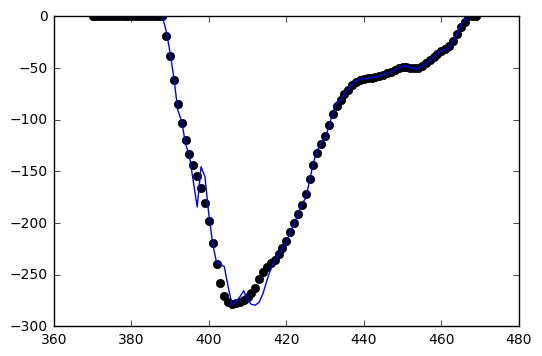

In [152]:
plt.plot(range(370,470),-core[370:470],'ko',range(370,470),-ws_bathy[370:470,0],'-');

We now have "core" which is the bathymetry at the mouth.  This continues 5 more grid points into the domain.  Beyond that we blend into the original bathymetry linearly over the next 10 grid points.  The only difficulty is that we need to follow the bathymetry south-east, so we need to shift south as we go.

In [153]:
for i in range(0,5):
    ws_bathy[370:470,i] = core[370:470]
i=5
ws_bathy[370:470,i] = (-i+15)/10.*core[370:470] + (i-5)/10.*ws_bathy[370:470,i]
i=6
ws_bathy[370:470,i] = (-i+15)/10.*(core[370:470]+core[371:471])/2. + (i-5)/10.*ws_bathy[370:470,i]
i=7
ws_bathy[370:470,i] = (-i+15)/10.*core[371:471] + (i-5)/10.*ws_bathy[370:470,i]
i=8
ws_bathy[370:470,i] = (-i+15)/10.*(core[371:471]+core[372:472])/2. + (i-5)/10.*ws_bathy[370:470,i]
i=9
ws_bathy[370:470,i] = (-i+15)/10.*core[372:472] + (i-5)/10.*ws_bathy[370:470,i]
i=10
ws_bathy[370:470,i] = (-i+15)/10.*(core[372:472]+core[373:473])/2. + (i-5)/10.*ws_bathy[370:470,i]
i=11
ws_bathy[370:470,i] = (-i+15)/10.*core[373:473] + (i-5)/10.*ws_bathy[370:470,i]
i=12
ws_bathy[370:470,i] = (-i+15)/10.*(core[373:473]+core[374:474])/2. + (i-5)/10.*ws_bathy[370:470,i]
i=13
ws_bathy[370:470,i] = (-i+15)/10.*core[374:474] + (i-5)/10.*ws_bathy[370:470,i]
i=14
ws_bathy[370:470,i] = (-i+15)/10.*(core[374:474]+core[375:475])/2. + (i-5)/10.*ws_bathy[370:470,i]


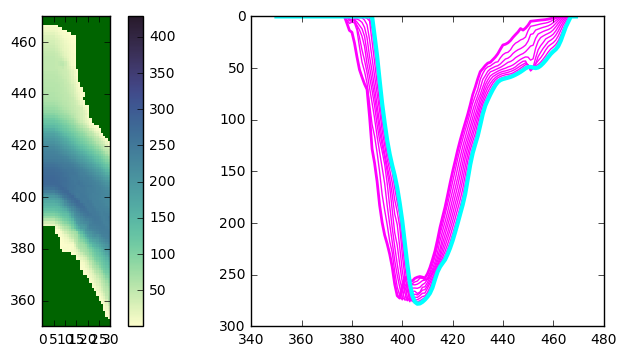

In [154]:
ws_masked = np.ma.masked_array(ws_bathy, ws_bathy == 0)
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

viz_tools.set_aspect(axs[0])
mesh = axs[0].pcolormesh(ws_masked, cmap=cmap)
fig.colorbar(mesh, ax=axs[0])
axs[0].set_ylim((350, 470))
axs[0].set_xlim((0, 30));

for j in range(1, 14):
    axs[1].plot(range(iss, iee), ws_bathy[iss:iee, j], color=scalarMap.to_rgba(i))
axs[1].plot(range(iss, iee), ws_bathy[iss:iee, 14], color=scalarMap.to_rgba(14), linewidth=2)
axs[1].plot(range(iss, iee), ws_bathy[iss:iee, 0], color=scalarMap.to_rgba(0), linewidth=3)

axs[1].invert_yaxis()

there is too much extra shallow water in the North.  We can't get rid of all of it, it is partially due to the direct Eastward extension of the boundary, but we can crop some.

In [192]:
top=470
bot=440
left = 3
right = 30

ws_bathy[bot+26,3+left:12+left] = 0
ws_bathy[bot+25,5+left:12+left] = 0
ws_bathy[bot+24,6+left:12+left] = 0
ws_bathy[bot+23,7+left:12+left] = 0
ws_bathy[bot+22,8+left:12+left] = 0
ws_bathy[bot+21,9+left:12+left] = 0
ws_bathy[bot+20,10+left:13+left] = 0
ws_bathy[bot+15:bot+20,11+left:13+left] = 0
ws_bathy[bot+11:bot+15,12+left:14+left] = 0


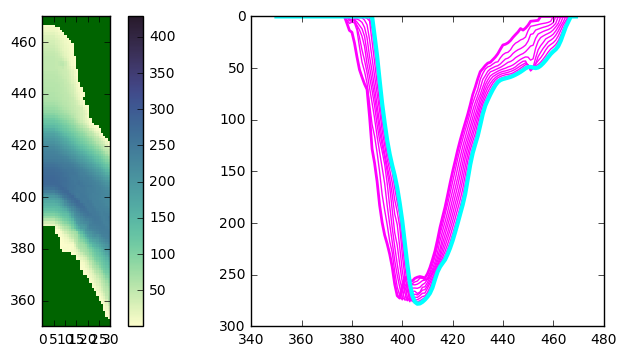

In [193]:
ws_masked = np.ma.masked_array(ws_bathy, ws_bathy == 0)
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

viz_tools.set_aspect(axs[0])
mesh = axs[0].pcolormesh(ws_masked, cmap=cmap)
fig.colorbar(mesh, ax=axs[0])
axs[0].set_ylim((350, 470))
axs[0].set_xlim((0, 30));

for j in range(1, 14):
    axs[1].plot(range(iss, iee), ws_bathy[iss:iee, j], color=scalarMap.to_rgba(i))
axs[1].plot(range(iss, iee), ws_bathy[iss:iee, 14], color=scalarMap.to_rgba(14), linewidth=2)
axs[1].plot(range(iss, iee), ws_bathy[iss:iee, 0], color=scalarMap.to_rgba(0), linewidth=3)

axs[1].invert_yaxis()

### 3. Add Shallow Jetty ###

In [195]:
sj_bathy = np.copy(ws_bathy[:])
ibase = 410
jbase = 295

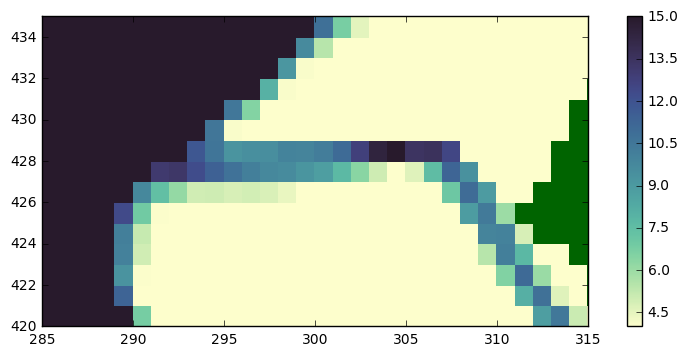

In [219]:
sj_masked = np.ma.masked_array(sj_bathy, sj_bathy == 0)
fig, ax = plt.subplots(1, 1, figsize=(10, 4))

vmax= 15
vmin = 4
viz_tools.set_aspect(ax)
mesh = ax.pcolormesh(sj_masked, cmap=cmap, vmax=vmax, vmin=vmin)
fig.colorbar(mesh, ax=ax)
ax.set_ylim((ibase+10, ibase+25))
ax.set_xlim((jbase-10, jbase+20));



In [226]:
x = np.arange(295, 309); jv_x = np.arange(295, 309); ju_x = 308
y = np.ones(14)*429; jv_y = np.ones(14)*429; ju_y = 429
print (x.shape, y.shape)
x = np.append(x, (308, 309)); jv_x = np.append(jv_x, 309); ju_x = np.append(ju_x, 309)
y = np.append(y, (428, 428)); jv_y = np.append(jv_y, 428); ju_y = np.append(ju_y, 428)
x = np.append(x, (309, 310)); jv_x = np.append(jv_x, 310); ju_x = np.append(ju_x, 310)
y = np.append(y, (427, 427)); jv_y = np.append(jv_y, 427); ju_y = np.append(ju_y, 427)
x = np.append(x, (310, 311)); jv_x = np.append(jv_x, 311); 
y = np.append(y, (426, 426)); jv_y = np.append(jv_y, 426); ju_y = np.append(ju_y, 426)
print (x.shape, y.shape, ju_x.shape)

# make end of jetty 4m deep
sj_bathy[429, 295] = 4

(14,) (14,)
(20,) (20,) (3,)


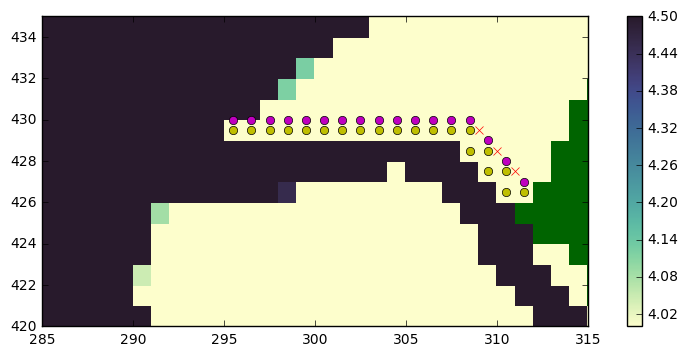

In [227]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))

vmax=4.5
vmin = 4
viz_tools.set_aspect(ax)
mesh = ax.pcolormesh(sj_masked, cmap=cmap, vmax=vmax, vmin=vmin)
fig.colorbar(mesh, ax=ax)
ax.set_ylim((ibase+10, ibase+25))
ax.set_xlim((jbase-10, jbase+20));

for j,i in zip(y,x):
    ax.plot(i+0.5, j+0.5, 'oy')
for j,i in zip(jv_y, jv_x):
    ax.plot(i+0.5, j+1, 'om')
for j,i in zip(ju_y, ju_x):
    ax.plot(i+1, j+0.5, 'xr')

### 4. Check Dredged Channel

In [383]:
dc_bathy = np.copy(sj_bathy[:])


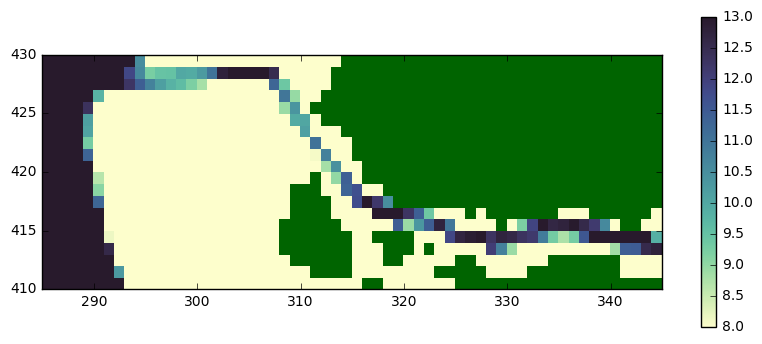

In [378]:
dc_masked = np.ma.masked_array(dc_bathy, dc_bathy == 0)
fig, ax = plt.subplots(1, 1, figsize=(10, 4))

vmax= 13
vmin = 8
viz_tools.set_aspect(ax)
mesh = ax.pcolormesh(dc_masked, cmap=cmap, vmax=vmax, vmin=vmin)
fig.colorbar(mesh, ax=ax)
ax.set_ylim((ibase, ibase+20))
ax.set_xlim((jbase-10, jbase+50));


According to: https://voony.files.wordpress.com/2012/10/gmtnauticalchart.jpg

it should be at least 10 m above datum = 13 m above msl deep north of Deas. So I'll make it continuous 13 m throughout.


In [464]:
dc_bathy[ibase+3, jbase+49] = 13
dc_bathy[ibase+3, jbase+48] = 13
dc_bathy[ibase+4, jbase+42] = 13
dc_bathy[ibase+5, jbase+42] = 13
dc_bathy[ibase+5, jbase+41] = 13
dc_bathy[ibase+5, jbase+40] = 13
dc_bathy[ibase+5, jbase+39] = 13
dc_bathy[ibase+5, jbase+37] = 13
dc_bathy[ibase+4, jbase+37] = 13
dc_bathy[ibase+4, jbase+36] = 13
dc_bathy[ibase+4, jbase+35] = 13
dc_bathy[ibase+4, jbase+34] = 13
dc_bathy[ibase+4, jbase+33] = 13
dc_bathy[ibase+4, jbase+31] = 13
dc_bathy[ibase+4, jbase+30] = 13
dc_bathy[ibase+4, jbase+29] = 13
dc_bathy[ibase+5, jbase+29] = 13
dc_bathy[ibase+5, jbase+28] = 13
dc_bathy[ibase+5, jbase+27] = 13
dc_bathy[ibase+5, jbase+26] = 13
dc_bathy[ibase+6, jbase+26] = 13
dc_bathy[ibase+6, jbase+25] = 13
dc_bathy[ibase+7, jbase+22] = 13
dc_bathy[ibase+7, jbase+20] = 13
dc_bathy[ibase+8, jbase+20] = 13
dc_bathy[ibase+8, jbase+19] = 13
dc_bathy[ibase+9, jbase+19] = 13
dc_bathy[ibase+9, jbase+18] = 13
dc_bathy[ibase+10, jbase+18] = 13
dc_bathy[ibase+10, jbase+17] = 13
dc_bathy[ibase+11, jbase+17] = 13
dc_bathy[ibase+11, jbase+16] = 13
dc_bathy[ibase+12, jbase+16] = 13
dc_bathy[ibase+13, jbase+16] = 13
dc_bathy[ibase+13, jbase+15] = 13
dc_bathy[ibase+14, jbase+15] = 13
dc_bathy[ibase+14, jbase+14] = 13
dc_bathy[ibase+15, jbase+14] = 13
dc_bathy[ibase+16, jbase+14] = 13
dc_bathy[ibase+16, jbase+13] = 13
dc_bathy[ibase+17, jbase+13] = 13
dc_bathy[ibase+17, jbase+12] = 13
dc_bathy[ibase+18, jbase+12] = 13
dc_bathy[ibase+18, jbase+7] = 13
dc_bathy[ibase+18, jbase+6] = 13
dc_bathy[ibase+18, jbase+5] = 13
dc_bathy[ibase+18, jbase+4] = 13
dc_bathy[ibase+18, jbase+3] = 13
dc_bathy[ibase+17, jbase+3] = 13
dc_bathy[ibase+17, jbase+2] = 13
dc_bathy[ibase+17, jbase+1] = 13
dc_bathy[ibase+17, jbase] = 13
dc_bathy[ibase+17, jbase-1] = 13
dc_bathy[ibase+17, jbase-2] = 13

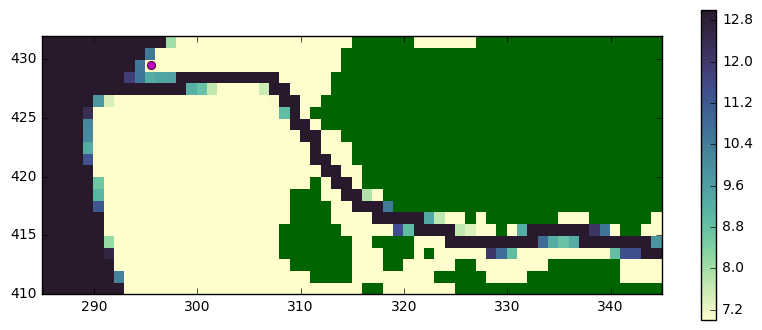

In [467]:
dc_masked = np.ma.masked_array(dc_bathy, dc_bathy == 0)
fig, ax = plt.subplots(1, 1, figsize=(10, 4))

vmax= 13
vmin = 7
viz_tools.set_aspect(ax)
mesh = ax.pcolormesh(dc_masked, cmap=cmap, vmax=vmax, vmin=vmin)
fig.colorbar(mesh, ax=ax)
ax.set_ylim((ibase, ibase+22))
ax.set_xlim((jbase-10, jbase+50));
ax.plot(x[0]+0.5, y[0]+0.5, 'om')

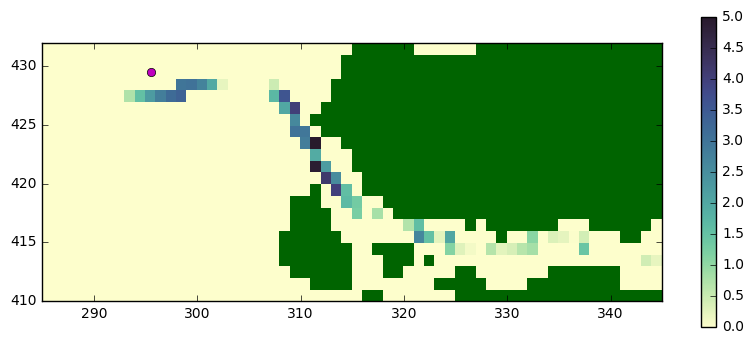

In [469]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))

vmax= 5
vmin = 0
viz_tools.set_aspect(ax)
mesh = ax.pcolormesh(dc_masked-sj_masked, cmap=cmap, vmax=vmax, vmin=vmin)
fig.colorbar(mesh, ax=ax)
ax.set_ylim((ibase, ibase+22))
ax.set_xlim((jbase-10, jbase+50));
ax.plot(x[0]+0.5, y[0]+0.5, 'om')

### 5. Smooth

In [475]:
# lets smooth
max_dh_over_hbar = 0.8
final_bathy = bathy_tools.smooth(dc_bathy, max_norm_depth_diff=max_dh_over_hbar, smooth_factor=0.2)

/ocean/sallen/allen/research/Meopar/Tools/SalishSeaTools/salishsea_tools/bathy_tools.py:376: RuntimeWarning: invalid value encountered in true_divide
  return np.abs(delta_depths / avg_depths)


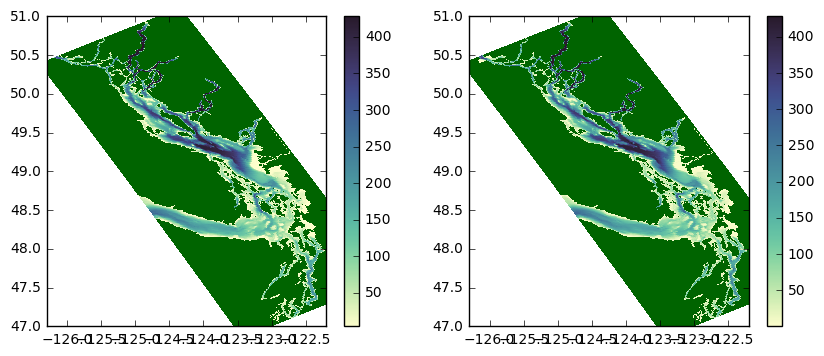

In [477]:
final_masked = np.ma.masked_array(final_bathy, final_bathy == 0)

fig, axs = plt.subplots(1, 2, figsize=(10, 4))
viz_tools.set_aspect(axs[0], coords='map')
mesh = axs[0].pcolormesh(lon[:], lat[:], md_bathy[:], cmap=cmap)
fig.colorbar(mesh, ax=axs[0])
axs[0].set_ylim(ylim)
axs[0].set_xlim(xlim)
viz_tools.set_aspect(axs[1], coords='map')
mesh = axs[1].pcolormesh(lon[:], lat[:], final_masked[:], cmap=cmap)
fig.colorbar(mesh, ax=axs[1])
axs[1].set_ylim(ylim)
axs[1].set_xlim(xlim);

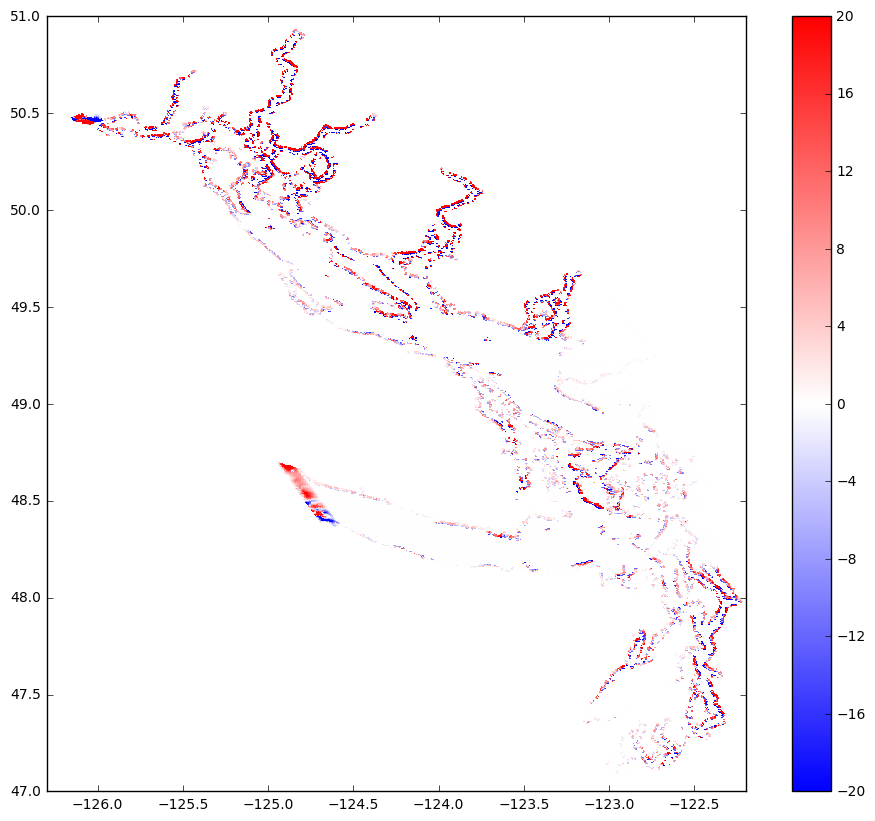

In [483]:
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
viz_tools.set_aspect(ax, coords='map')
mesh = ax.pcolormesh(lon[:], lat[:], final_masked-md_bathy[:], cmap='bwr', vmax=20, vmin=-20)
fig.colorbar(mesh, ax=ax)
ax.set_ylim(ylim)
ax.set_xlim(xlim);